In [1]:
# Carrega pacotes 
library(tidyverse)
library(tm)
library(tidytext)
library(textstem)
library(tidyverse)
library(abjutils)
library(googleVis)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──

✔ ggplot2 3.2.1     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: koRpus.lang.en

Loading required package: koRpus

Loading required package: sylly

For information on available language packages for 'koRpus', run

  available.koRpus.lang()

and see ?install.koRpus.lang()



Attaching package: ‘koRpus’


The following object is masked from ‘package:readr’:

    tokenize


Creating a generic function for ‘toJSON’ from package ‘jsonlite’ in package ‘googleVis’


Welcome to googleVis version 0.6.5

Please read Google's Te

In [2]:
# Carrega arquivo de lematização
lemma_dic = read.delim(file = "../../dados/lemmatization-pt.txt", header = FALSE, stringsAsFactors = FALSE)

In [3]:
# Mudando os nomes e alterando a ordem das colunas, e selecionado apenas um 
# lema por token
names(lemma_dic) <- c("lemma", "token")
lemma_dic <- lemma_dic %>% group_by(token) %>% slice(1) %>% select(2, 1)


In [31]:
# Confere o total de mensagens coletadas e as colunas, antes dos filtros

df = read.csv("../../dados/tweets_2020-06-20.csv")
glimpse(df)



Observations: 16,404
Variables: 36
$ X               <fct> 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15,…
$ id              <fct> 1271538778063212544, 1268541744049774592, 12685327986…
$ conversation_id <fct> 1271144392993189888, 1268541744049774592, 12685327986…
$ created_at      <fct> 1591993443000, 1591278894000, 1591276762000, 15912766…
$ date            <fct> 2020-06-12, 2020-06-04, 2020-06-04, 2020-06-04, 2020-…
$ time            <fct> 17:24:03, 10:54:54, 10:19:22, 10:18:02, 07:11:40, 07:…
$ timezone        <int> -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -3, -…
$ user_id         <fct> 4136747609, 704674034332602368, 1241250151, 100377769…
$ username        <fct> francisco2912j, estrategia161, ardnas440, intervencio…
$ name            <fct> Francisco, Estratégia Global, JESUS É A SOLUÇÃO, INTE…
$ place           <fct> , , , , , , , , , , , , , , , , , , , , , , , , , 
$ tweet           <fct> "Daí só tiro a chape,por o único culpado ali foi o do…
$ mentions        <fc

In [32]:
#pontuacao = c(',','.')

# Remove acentos e coloca em minúsculas
df = df %>% select(id,link,conversation_id,date,username,name,place,tweet,mentions,urls,photos,replies_count,
                     likes_count,hashtags) %>%
    mutate(tweet_processado = rm_accent(tweet)) %>% mutate(tweet_processado = tolower(tweet_processado)) %>% 
    mutate(tweet_processado = removePunctuation(tweet_processado)) %>%
    mutate(tweet_processado = iconv(tweet_processado, "latin1", "ASCII", sub="")) %>%
    mutate(date = as.Date(.$date)) %>% filter(date < "2020-01-01")

In [33]:
df %>% select(tweet) %>% head(10)

,tweet
,<fct>
1,"Reboque ultrapassando os atiradores. Na missão de Tiro Aéreo, uma aeronave leva o alvo e as outras duas atiram nesse alvo com o canhão de 20mm. ⠀ ⠀ #bimotor #forçaaerea #militar #militarismo #militares #vidamilitar… https://www.instagram.com/p/B6LdZwbhIk4/?igshid=1xkadr8qfn4ds …"
2,Gastando o dinheiro do povo brincando de andar de helicóptero e dando tiro e o pior com aeronave das forças armadas vergonha
3,"Eu sou índio que estava lá embaixo trocando tiro com eles. Acertei o helicóptero com a munição de paintboll na cor que escolhi. Não vou mais brincar, eles não aceitaram perder. 🤣👍 Aeronave abatida."
4,"É tudo mto lamentável!!!! Mas vamos raciocinar, o avião presidencial traficou drogas esse ano (2019). Seria correto supor que a polícia trocasse tiros com tripulação da aeronave e eventualmente matasse algum ""inocente"" que estava junto?"
5,"Já que ""interceptou"" por que não abateu? Será que deram os tiros de advertência a aeronave invasora do espaço aéreo nacional? Responde ai estagiário da globolixo! https://twitter.com/allantercalivre/status/1198704848037916672 …"
6,"Já dizia minha avó Filó, quem com porcos se mistura, farelos come e por mais ingênuo que possamos aparentar, não cremos que a sua aeronave era a única disponível para uso do molusco. Tiro no pé."
7,"O tiro saiu pela culatra. Avião com Evo Morales é forçado a pousar em Chimoré (Cochabamba), pois teve o espaço aéreo fechado para sua aeronave no Brasil, Chile, Peru e Argentina. Ele esqueceu-se de um pequeno detalhe: Macri ainda é Presidente em exercício na Argentina."
8,"O tiro saiu pela culatra. Avião com Evo Morales é forçado a pousar em Chimoré (Cochabamba), pois teve o espaço aéreo fechado para sua aeronave no Brasil, Chile, Peru e Argentina. Ele esqueceu-se de um pequeno detalhe: Macri ainda é Presidente em exercício na Argentina. 😂 😂"
9,"Opa! Parece que o tiro saiu pela culatra amigos. Avião com Evo Morales é forçado a pousar em Chimoré (Cochabamba), pois teve o espaço aéreo fechado para sua aeronave no Brasil, Chile, Peru e Argentina. Ele esqueceu-se... https://www.facebook.com/azmacro/posts/10158144089190864 …"


In [34]:
# Define temas que serão excluídos
temas_fora = paste(c('lula', 'brumadinho', 'ibama','aguia-imperial','300 tiro','300 tiros',
              'aviao do exercito norte-americano realiza 3 mil disparos por minuto',
               'metralhadora M134D onde dispara 6.000 tiros','ja era o aguia 1','gostei de um video',
                 'sequencia de papum','trezentos tiros','helicoptero da globo','caiu na baia de guanabara',
                    'aguia vim de troia','aguia que voas','aguia que voaste','estoril','aguia gigante e morta',
                    'helicoptero faz pouso forcado','helicoptero chega botando terror',
                     'helicoptero que chega botando','pouso no paquistao',
                     'helicoptero da policia civil e alvo','helicoptero que pousou em praia',
                    'aeronave e atingida por tiro no es','http','https','brincar de tarzan',
                     'tiro de meta','tiro de canhao','helicoptero da rede globo',
                    'botando terror mais uma bala perdida','mais uma bala perdida q','narcotraficantes e seu comboio',
                    'pode chamar o dois porque ja era o aguia um','cabeca tem um helicoptero','aguia vir de troia',
                    'vai ter esculacho','tacou pra cidade nova','araturi','pouquinho de deficit de atencao',
                    'hotel de luxo','mega operacao aguia blindado','identifico sexualmente',
                     'especialistas de gabinete','morro do castro'), collapse='|')

In [35]:
# Filtra mensagens não relacionadas 
base = df %>% filter(!str_detect(tweet_processado,temas_fora))
#%>% filter(!str_detect(username,'rj_ott'))

glimpse(base)

Observations: 9,204
Variables: 15
$ id               <fct> 1205806600008679425, 1205778425656557569, 1202624616…
$ link             <fct> https://twitter.com/EMMANUE68986472/status/120580660…
$ conversation_id  <fct> 1205501297669095424, 1205501297669095424, 1202592542…
$ date             <date> 2019-12-14, 2019-12-14, 2019-12-05, 2019-11-12, 201…
$ username         <fct> emmanue68986472, mgpecorella, mariliaccar, pbanjos2,…
$ name             <fct> "EMMANUEL Santos", "Marcelo Gomes", "Marília Cardoso…
$ place            <fct> , , , , , , , , , , , , , , , , , , , , , , , , , 
$ tweet            <fct> "Gastando  o dinheiro do povo brincando de andar de …
$ mentions         <fct> "['carlosbolsonaro']", "['gratidao_980', 'barrosrd',…
$ urls             <fct> [], [], [], [], [], [], [], [], [], [], [], [], [], …
$ photos           <fct> [], [], [], [], [], [], [], [], [], [], [], [], [], …
$ replies_count    <int> 0, 1, 4, 0, 0, 61, 0, 138, 1, 3, 1, 0, 1, 0, 0, 0, 5…
$ likes_count      <i

In [11]:
link = "https://docs.google.com/spreadsheets/d/17ldElG0o5PjLZ_CiYRViOpOc_pfd3k4ukEl6Mm7c0Ms/gviz/tq?tqx=out:csv&sheet=DADOS"

df_op = read.csv(link)  %>% mutate(date = as.Date(.$DATA,format = "%d/%m/%Y")) %>%
  filter(date > "2018-01-01" & date < "2020-01-01") %>% select(date)

glimpse(df_op)


Observations: 101
Variables: 1
$ date <date> 2018-10-26, 2019-11-28, 2018-05-21, 2018-10-24, 2018-01-24, 201…


In [33]:
write.csv(left_join(df_op,base),"mensagens_de_interesse.csv")

Joining, by = "date"



In [34]:
write.csv(right_join(df_op,base),"mensagens_a_descartar.csv")

Joining, by = "date"



In [36]:
# data_frame(texto = as.character(base$tweet_processado)) %>%
#  unnest_tokens(palavras, texto, token = "words") %>% 
#  group_by(palavras) %>% count() %>% arrange(-n) %>%  head(50) 

In [39]:
relatos = base  %>% filter(str_detect(tweet,"acord|sonh"))

In [40]:
write.csv2(relatos,"acordar_sonhar.csv")

In [235]:
# Exemplo de mensagens não relacionadas ao assunto que serão removidas
df %>% filter(str_detect(tweet,"por minuto foi")) %>% head(10)

,tweet
,<fct>
1,"300 por minuto foi sequencia de papum pd chamar o 2 pq ja era o águia 1, 300 por minuto so no ventilador, foi tiro p krlh q o fuzil ate esquento🎶🎶rlk"
2,Trezentos tiros por minuto foi sequência de papum Pode chamar o dois porque já era o águia um Trezentos por minutos só no ventilador Foi tiro pra caralho que o fuzil até esquentou
3,Hoje tá sendo um daqueles dias que SE EU TIVESSE UMA ARMA EU IA TÁ ASSIM: Trezentos tiros por minuto foi sequência de papum Pode chamar o dois porque já era o águia um Trezentos por minutos só no ventilador Foi tiro pra caralho que o fuzil até esquentou
4,Trezentos tiro por minuto foi sequencia de pá pum pode chamar o dois porque já era o águia um
5,Trezentos tiros por minuto foi sequência de papum Pode chamar o dois porque já era o águia um 🎤💥
6,Trezentos tiro por minuto foi sequencia de pá pum Pode chamar o dois por que ja era o águia um
7,Trezentos tiros por minuto foi sequência de papum pode chamar o dois porque já era o águia um
8,"Trezentos tiros por minuto foi sequência de papum, pode chamar o 2 porque já era o águia 1... 👽"
9,Trezentos tiros por minuto foi sequência de papum pode chamar o dois porque já era o águia um


In [16]:
texto_processado = data_frame(texto = as.character(base$tweet_processado)) %>%
  mutate(texto = rm_accent(texto)) %>% 
  unnest_tokens(palavras, texto) %>%
  mutate(
    stem = stem_words(palavras, language = "portuguese"),
    lemma = lemmatize_words(palavras, dictionary = lemma_dic))

In [17]:
texto_processado

palavras,stem,lemma
<chr>,<chr>,<chr>
gastando,gast,gastar
o,o,o
dinheiro,dinheir,dinheiro
do,do,do
povo,pov,povo
brincando,brinc,brincar
de,de,de
andar,andar,andar
de,de,de


In [188]:
# Removendo stopwords
sementes = c("tiro","helicoptero","aeronave","disparo","favela","sapao","policia","aguia","caveirao","aereo")

stopwords_extra = c("ser","dar","pra","ir","nao","pra","ta","q","so","aqui","ja","vai","status","twitter.com",
                    "pic.twitter.com","http","dar","ser","ate","la","agora","sao","nada","https","pode",
                   "1","2","ai","p","porque","dois","pq","to","n","t","vc","bit.ly","tao","onde","glo.bo","tava")

stopwords_pt <- data.frame(palavras = c(stopwords(kind = "pt"),sementes,stopwords_extra))

texto_sem_stopwords <- anti_join(texto_processado, stopwords_pt, 
                                 by = "palavras")


Warning message:
“Column `palavras` joining character vector and factor, coercing into character vector”


In [191]:
contagem_lemas = texto_sem_stopwords %>% 
  group_by(lemma) %>% 
  count() %>% arrange(-n) %>% head(55)

In [198]:
# Mensagens sobre "acordar"
base %>% select(tweet) %>% filter(str_detect(tweet,"acordar"))

tweet
<fct>
"Maior burocracia pra ser acordada desse jeito 🙄 no mínimo irei acordar com o som do Águia, ou troca de tiro 🤷 https://twitter.com/_lauram26/status/1208919441737687041 …"
Hoje é um daqueles dias que vou dormir com medo de acordar com barulho de tiro e do águia
tava com tanto sono q nem os tiros me acordaram só o águia mrm
"Muito ruim acordar no susto, com barulhos de tiros, fogos e com o águia sobrevoando e mandando tiro p baixo sem nem querer saber em quem vai pegar"
"mano, só defende essa merda quem não sofre com a ação desses desgraçados,, eu canso de acordar 5h da manhã com o águia tremendo minha cama, tenho q sair debaixo de tiro p trabalhar. complicado demais. https://twitter.com/andregallindo/status/1161262379184865281 …"
Minhas bebês acordaram no susto 😒 o águia passou aq dando muito tiro 🖕 cortou até meu sono 😒😅
Nem os tiros e nem o aguia acordaram a gente hoje. Sono pesado com meu neném.
"Morar em favela é isso né, acordar essa hora no susto pulando da cama com o águia mandando tiro."
"Que Deus proteja todos os moradores da CDD,não tem nada mais aterrorizante do que acordar com aquele águia sobrevoando e atirando sem se importar aonde aquele tiro vai chegar"


In [15]:
# Mensagens sobre "acordar"
base %>% select(tweet_processado) %>% filter(str_detect(tweet,"acordar"))

ERROR: Error in stri_detect_regex(string, pattern, negate = negate, opts_regex = opts(pattern)): objeto 'tweet' não encontrado


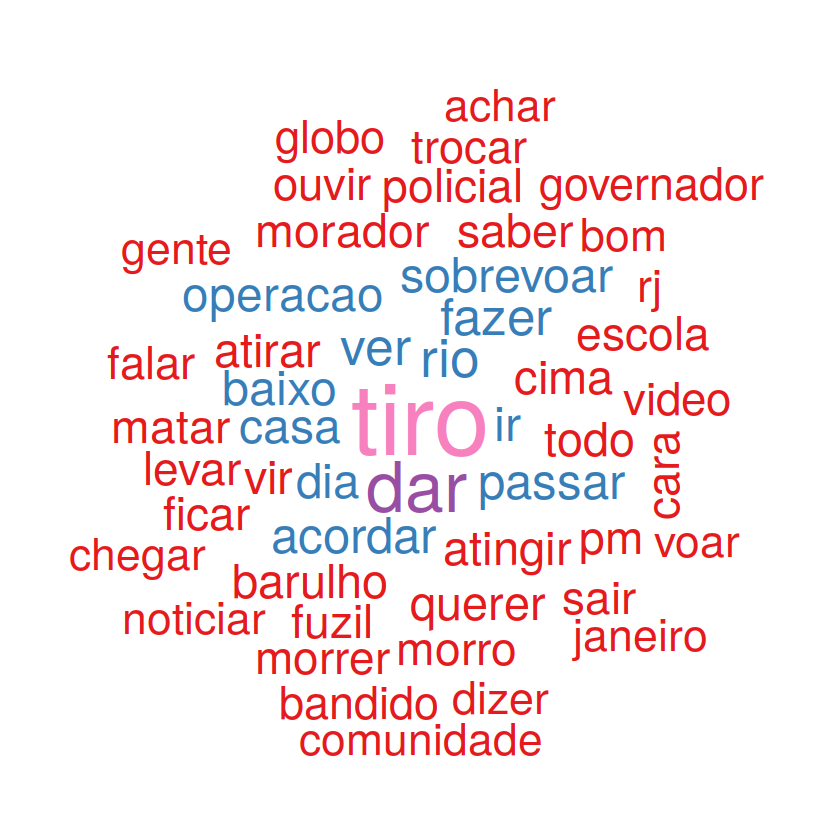

In [192]:
# Wordclouds -----------
library(wordcloud)
library(RColorBrewer)

# Criando um vetor de cores para colorir as wordclouds
cor <- brewer.pal(8,"Set1")

# Sem stopwords ---------
contagem_lemas %>% 
  with(wordcloud(lemma, n, random.order = FALSE,scale=c(5,2), max.words = 50, colors=cor))


In [214]:
texto = base %>% select(tweet) %>% head(10)

wt = gvisWordTree(texto, textvar = 'tweet')

plot(wt)